In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', '{:.0f}'.format)

In [141]:
data=pd.read_csv('/content/cancer.csv',index_col='ID')
data.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
ID,,,,,,,,,,,,,,,,
0,49,Male,Poland,2023-10-16,Stage III,Yes,Passive Smoker,18,166,1,1,0,0,Chemotherapy,2025-03-28,0
1,53,Male,Slovakia,2017-04-07,Stage I,No,Former Smoker,41,291,1,0,0,0,Chemotherapy,2018-11-12,0
2,38,Female,Latvia,2019-04-29,Stage IV,No,Former Smoker,44,255,1,0,1,0,Surgery,2020-05-21,0
3,40,Male,Estonia,2016-06-22,Stage I,No,Never Smoked,41,285,1,1,0,0,Surgery,2017-11-24,0
4,69,Male,Netherlands,2018-05-31,Stage III,Yes,Current Smoker,28,187,1,1,0,0,Combined,2019-04-25,1


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32624 entries, 0 to 32623
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 32567 non-null  float64
 1   gender              32624 non-null  object 
 2   country             32624 non-null  object 
 3   diagnosis_date      32624 non-null  object 
 4   cancer_stage        32624 non-null  object 
 5   family_history      32624 non-null  object 
 6   smoking_status      32624 non-null  object 
 7   bmi                 32555 non-null  float64
 8   cholesterol_level   32564 non-null  float64
 9   hypertension        32556 non-null  float64
 10  asthma              32564 non-null  float64
 11  cirrhosis           32563 non-null  float64
 12  other_cancer        32560 non-null  float64
 13  treatment_type      32624 non-null  object 
 14  end_treatment_date  32624 non-null  object 
 15  survived            32563 non-null  float64
dtypes: float6

In [143]:
data.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,32567,32555,32564,32556,32564,32563,32560,32563
mean,939,294,234,19,16,0,3,3
std,72155,28116,42,1357,1239,0,554,554
min,0,0,0,0,0,0,0,0
25%,48,24,199,1,0,0,0,0
50%,55,31,242,1,0,0,0,0
75%,61,38,269,1,1,0,0,0
max,6900000,3580000,300,100000,100000,1,100000,100000


In [144]:
data.isna().sum()

,0
age,57
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,69
cholesterol_level,60
hypertension,68


In [145]:
data.dtypes

,0
age,float64
gender,object
country,object
diagnosis_date,object
cancer_stage,object
family_history,object
smoking_status,object
bmi,float64
cholesterol_level,float64
hypertension,float64


In [146]:
data['survived'].value_counts()
#here there there is an imbalance in the data

,count
survived,
0,26018
1,6543
100000,1
0,1


In [147]:
for i in data.columns:
  if(data[i].dtype=="object" and data[i].nunique()<30):
    print(f"{i} has {data[i].nunique()} with {data[i].unique()}\n")
data.drop(columns=['country'],inplace=True)

gender has 2 with ['Male' 'Female']

country has 27 with ['Poland' 'Slovakia' 'Latvia' 'Estonia' 'Netherlands' 'Slovenia' 'Denmark'
 'Greece' 'France' 'Malta' 'Lithuania' 'Hungary' 'Croatia' 'Spain'
 'Finland' 'Belgium' 'Cyprus' 'Czech Republic' 'Ireland' 'Sweden'
 'Luxembourg' 'Bulgaria' 'Austria' 'Italy' 'Portugal' 'Germany' 'Romania']

cancer_stage has 4 with ['Stage III' 'Stage I' 'Stage IV' 'Stage II']

family_history has 2 with ['Yes' 'No']

smoking_status has 4 with ['Passive Smoker' 'Former Smoker' 'Never Smoked' 'Current Smoker']

treatment_type has 4 with ['Chemotherapy' 'Surgery' 'Combined' 'Radiation']



In [148]:
for i in data.select_dtypes(include=float):
  print(f"{i} has {data[i].isnull().sum()} null values")

age has 57 null values
bmi has 69 null values
cholesterol_level has 60 null values
hypertension has 68 null values
asthma has 60 null values
cirrhosis has 61 null values
other_cancer has 64 null values
survived has 61 null values


In [149]:
data.age.describe()
#as you can see here the max value is 690000 which is error so we will set a condition to check each


,age
count,32567
mean,939
std,72155
min,0
25%,48
50%,55
75%,61
max,6900000


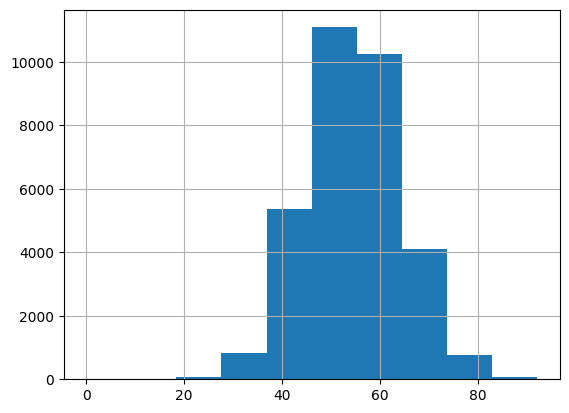

In [150]:
data.loc[(data['age']<0)|(data['age']>120),'age']=np.nan
data['age'].hist()
data['age']=data['age'].fillna(data['age'].median())

In [151]:
data.bmi.describe()


,bmi
count,32555
mean,294
std,28116
min,0
25%,24
50%,31
75%,38
max,3580000


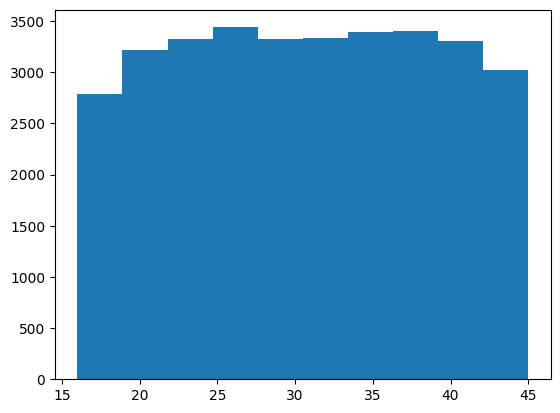

In [152]:
data.loc[(data['bmi']<10)|(data['bmi']>60),'bmi']=np.nan
plt.hist(data.bmi)
data['bmi']=data['bmi'].fillna(data['bmi'].median())

cholesterol_level
0        1
0        1
0        1
0        1
0        1
      ... 
264    321
253    326
260    328
263    336
265    341
Name: count, Length: 156, dtype: int64


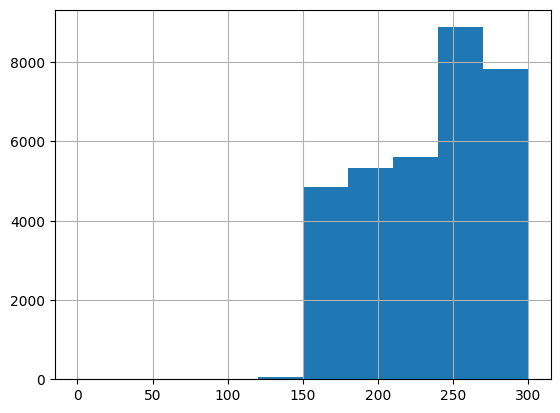

In [153]:
data.cholesterol_level.hist()
print(data['cholesterol_level'].value_counts().sort_values())
data.loc[data['cholesterol_level']<50,'cholesterol_level']=np.nan
data['cholesterol_level']=data['cholesterol_level'].fillna(data['cholesterol_level'].median())

In [154]:
print(data.hypertension.describe())
print()
print(data['hypertension'].value_counts().head())
data.loc[(data['hypertension']<0)|(data['hypertension']>1),'hypertension']=np.nan
#here hypertension missing values can give out crucial info on the patient health
#so instead of just giving nan values something we will create another column which indicates if the column value is null and set the hypertension column null values 0
data['hypertension_null']=data['hypertension'].isna().astype(int)
data['hypertension'].fillna(0,inplace=True)

count    32556
mean        19
std       1357
min          0
25%          1
50%          1
75%          1
max     100000
Name: hypertension, dtype: float64

hypertension
1         24725
0          7820
100000        6
0             5
Name: count, dtype: int64


/tmp/ipython-input-1621353809.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['hypertension'].fillna(0,inplace=True)


In [155]:
print(data.asthma.describe())
print()
print(data.asthma.value_counts().head())
data.loc[(data['asthma']<0)|(data['asthma']>1),'asthma']=np.nan
#here asthma missing values can give out crucial info on the patient health
#so instead of just giving nan values something we will create another column which indicates if the column value is null and set the asthma column null values 0
data['asthma_null']=data['asthma'].isna().astype(int)
data['asthma'].fillna(0,inplace=True)

count    32564
mean        16
std       1239
min          0
25%          0
50%          0
75%          1
max     100000
Name: asthma, dtype: float64

asthma
0         17392
1         15160
0             7
100000        5
Name: count, dtype: int64


/tmp/ipython-input-1417687214.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['asthma'].fillna(0,inplace=True)


count   32563
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max         1
Name: cirrhosis, dtype: float64


/tmp/ipython-input-1972811211.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cirrhosis'].fillna(0,inplace=True)


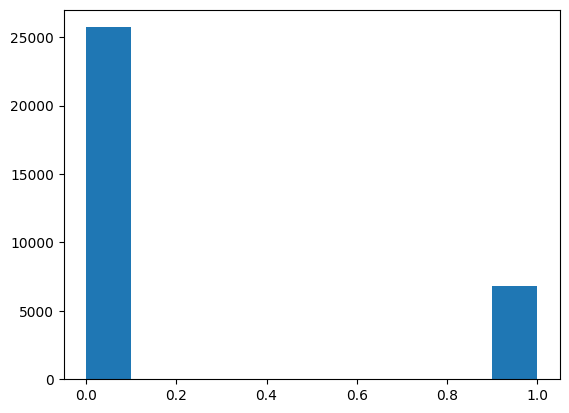

In [156]:
print(data['cirrhosis'].describe())
plt.hist(data['cirrhosis'])
#here cirrhosis missing values can give out crucial info on the patient health
#so instead of just giving nan values something we will create another column which indicates if the column value is null and set the cirrhosis column null values 0
data['cirrhosis_null']=data['cirrhosis'].isna().astype(int)
data['cirrhosis'].fillna(0,inplace=True)

In [157]:
print(data['other_cancer'].describe())
print()
print(data['other_cancer'].value_counts().head())
data.loc[(data['other_cancer']<0)|(data['other_cancer']>1),'other_cancer']=np.nan
#here other_cancer missing values can give out crucial info on the patient health
#so instead of just giving nan values something we will create another column which indicates if the column value is null and set the other_cancer column null values 0
data['other_cancer_null']=data['other_cancer'].isna().astype(int)
data['other_cancer'].fillna(0,inplace=True)

count    32560
mean         3
std        554
min          0
25%          0
50%          0
75%          0
max     100000
Name: other_cancer, dtype: float64

other_cancer
0         30080
1          2479
100000        1
Name: count, dtype: int64


/tmp/ipython-input-2150344754.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['other_cancer'].fillna(0,inplace=True)


In [158]:
print(data['survived'].describe())
print()
data.loc[(data['survived']<0)|(data['survived']>1),'survived']=np.nan
data=data.dropna(subset=['survived'])
#here we drop the rows with null values

count    32563
mean         3
std        554
min          0
25%          0
50%          0
75%          0
max     100000
Name: survived, dtype: float64



In [159]:
data['diagnosis_date']=pd.to_datetime(data['diagnosis_date'],errors='coerce')
data['end_treatment_date']=pd.to_datetime(data['end_treatment_date'],errors='coerce')
data['treatment_duration']=(data['end_treatment_date']-data['diagnosis_date']).dt.days
data.drop(columns=['diagnosis_date','end_treatment_date'],inplace=True)

In [160]:
data.isna().sum()


,0
age,0
gender,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0
asthma,0
cirrhosis,0


In [161]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)


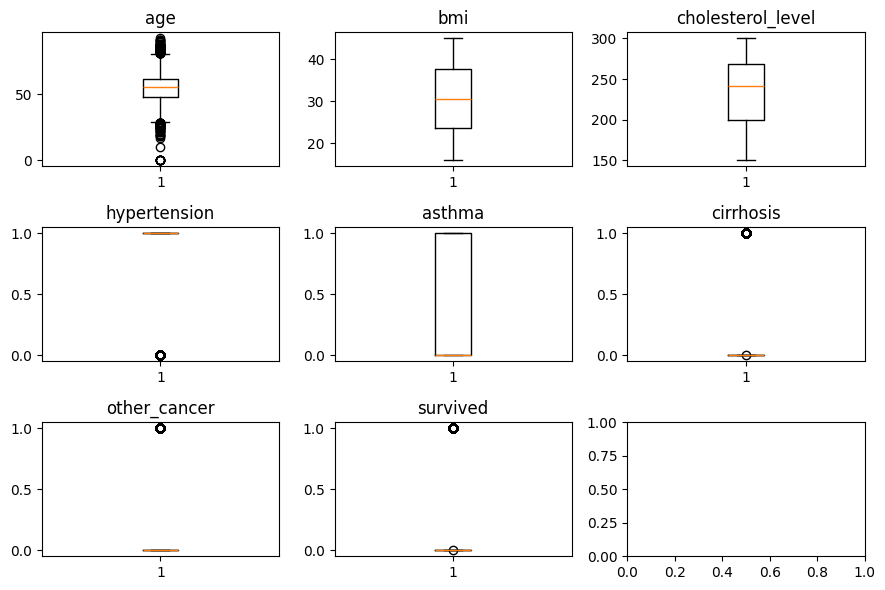

In [162]:
#to check for outliers
fig,axes=plt.subplots(3,3,figsize=(3*3,2*3))
axes=axes.flatten()
for ax,col in zip(axes,data.select_dtypes(include=float)):
  ax.boxplot(data[col].dropna())
  ax.set_title(col)
plt.tight_layout()
plt.savefig("no_outliers.png")
plt.show()
#here these outliers are important to the prediction model
#but the values of bmi has a slight level of outliers so we clip it using iqr

In [163]:
Q1,Q3=data['bmi'].quantile([0.25, 0.75])
IQR=Q3-Q1
data['bmi']=data['bmi'].clip(Q1-1.5*IQR,Q3+1.5*IQR)

In [164]:
for i in data.select_dtypes(include=object):
  print(i)

gender
cancer_stage
family_history
smoking_status
treatment_type


In [173]:
data.head()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,hypertension_null,asthma_null,...,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
ID,,,,,,,,,,,,,,,,,,,,,
0,49,18,166,1,1,0,0,0,0,0,...,False,True,False,True,False,False,True,False,False,False
1,53,41,291,1,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,38,44,255,1,0,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
3,40,41,285,1,1,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,True
4,69,28,187,1,1,0,0,1,0,0,...,False,True,False,True,False,False,False,True,False,False


In [166]:
for i in data.select_dtypes(include=object):
  if((data[i].nunique())<=5):
    data=pd.get_dummies(data,columns=[i],drop_first=True)


In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,roc_auc_score,recall_score,accuracy_score,precision_score
X=data.drop(columns=['survived'])
y=data['survived'].astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [168]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [174]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22758 entries, 30799 to 23654
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            22758 non-null  float64
 1   bmi                            22758 non-null  float64
 2   cholesterol_level              22758 non-null  float64
 3   hypertension                   22758 non-null  float64
 4   asthma                         22758 non-null  float64
 5   cirrhosis                      22758 non-null  float64
 6   other_cancer                   22758 non-null  float64
 7   hypertension_null              22758 non-null  int64  
 8   asthma_null                    22758 non-null  int64  
 9   cirrhosis_null                 22758 non-null  int64  
 10  other_cancer_null              22758 non-null  int64  
 11  treatment_duration             22758 non-null  int64  
 12  gender_Male                    22758 non-null  

In [170]:
log_reg=LogisticRegression(
    class_weight='balanced',
    max_iter=1000)
log_reg.fit(X_train_scaled,y_train)
y_pred=log_reg.predict(X_test_scaled)
y_pred_proba=log_reg.predict_proba(X_test_scaled)
print(f"Precision Score:{precision_score(y_test,y_pred):.2f}")
print(f"Accuracy Score:{accuracy_score(y_test,y_pred):.2f}")
print(f"Recall Score:{recall_score(y_test,y_pred):.2f}")
print("ROC AUC:",roc_auc_score(y_test,y_pred_proba[:,1]))


Precision Score:0.22
Accuracy Score:0.55
Recall Score:0.48
ROC AUC: 0.5255006661944668


In [171]:
rf=RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [172]:
y_pred_proba=log_reg.predict_proba(X_test)[:,1]
print(f"Accuracy Score:{accuracy_score(y_test,y_pred)}")
print(f"Precision score:{precision_score(y_test,y_pred)}")
print(f"Recall Score:{recall_score(y_test,y_pred)}")
print(f"ROC AUC Score:{roc_auc_score(y_test,y_pred_proba)}")


Accuracy Score:0.7971088784088579
Precision score:0.7931034482758621
Recall Score:0.011523046092184368
ROC AUC Score:0.49406514756762815


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
